In this lesson, we're going to be looking at movie budget and revenue data. This dataset is perfect for trying out some new tools like scikit-learn to run a linear regression and seaborn, a popular data visualisation library built on top of Matplotlib. 

The question we want to answer today is: Do higher film budgets lead to more revenue in the box office? In other words, should a movie studio spend more on a film to make more? 

As with any dataset, the first steps are going to be data exploration and data cleaning. We need to get a better understanding of what we're dealing with.

# Explore and Clean the Data:

In [1]:
import pandas as pd

# Using this library for chart creation:
import matplotlib.pyplot as plt

# Openning our table:
df = pd.read_csv('D:\\Desktop\\Study\\100 Days of Code - The Complete Python Pro Bootcamp for 2021\\DATA\\Linear Regression and Data Visualisation with Seaborn\\cost_revenue_dirty.csv')

In [2]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# How many rows and columns does the dataset contain?

In [3]:
df.shape

(5391, 6)

# Are there any NaN values present?

In [4]:
df.isnull().values.any()

False

In [5]:
df.isna().values.any()

False

# Are there any duplicate rows?

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5386    False
5387    False
5388    False
5389    False
5390    False
Length: 5391, dtype: bool

We can see the total number of duplicates by creating a subset and looking at the length of that subset:

In [6]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

0

# What are the data types of the columns?

The fact that there are no duplicates or NaN (not-a-number) values in the dataset will make our job easier. We can also see if there are null values in .info(), which also shows us that we need to do some type conversion.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


# Convert to a numeric format:

Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing $ signs and ,.

In order to convert the data in the budget and revenue columns and remove all the non-numeric characters, we can use a nested for loop. We create two Python lists: the characters to remove and the column names. Inside the nested loop we can combine .replace() and .to_numeric() to achieve our goal.

In [7]:
df.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"


In [2]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])


<ipython-input-2-4add36afd78a>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace(char, "")


In [9]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


# Convert the Release_Date column to a DateTime objec:

To convert the Release_Date column to a DateTime object, all we need to do is call the to_datetime() function.

In [3]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [12]:
df.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


# Investigate the Films that had Zero Revenue:

Now that we've done some legwork on cleaning our data, we can investigate our data set more thoroughly.

We can answer many of the questions with a single command: .describe().

In [25]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


The average film costs about 31m to make and makes around 3x that (or ~89m) in worldwide revenue. So that's encouraging.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is 5 million and they only bring in 3.8m in worldwide revenue!

The minimum domestic and worldwide revenue is 0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was 425,000,000 and the highest worldwide revenue was 2,783,918,982. 2.7 Billion revenue! Holy smokes.

# What is the average production budget of the films in the data set?

In [15]:
df.shape

(5391, 6)

In [16]:
total_budget = df.USD_Production_Budget.sum()
print(f"The total USD_Production_Budget budget is: {total_budget}")

The total USD_Production_Budget budget is: 167734159285


In [17]:
average_budget = total_budget/5391
print(f"The average USD_Production_Budget budget is: {average_budget}")

The average USD_Production_Budget budget is: 31113737.57837136


# What is the average worldwide gross revenue of films?

In [18]:
total_worldwide_gross = df.USD_Worldwide_Gross.sum()
print(total_worldwide_gross)

479019579801


In [19]:
average_worldwide_gross = total_worldwide_gross/5391
print(average_worldwide_gross)

88855421.96271564


# What were the minimums for worldwide and domestic revenue?

In [20]:
df.USD_Worldwide_Gross.min()

0

In [21]:
df.USD_Domestic_Gross.min()

0

# Are the bottom 25% of films actually profitable or do they lose money?

# What are the highest production budget and highest worldwide gross revenue of any film?

In [23]:
print(f"The highest production budget is: {df.USD_Production_Budget.max()}")

The highest production budget is: 425000000


In [24]:
print(f"The highest worldwide gross is: {df.USD_Worldwide_Gross.max()}")

The highest worldwide gross is: 2783918982


# So which film was the lowest budget film in the dataset?

In [11]:
df[df.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,5/8/2005,My Date With Drew,1100,181041,181041


I've ... never heard of this film. But it looks like a real money maker. It grossed $181,041 with a measly $1,100 budget. 😮 Wow. Talk about return on investment!

# And the highest budget film in the dataset is:

In [12]:
df[df.USD_Production_Budget == 4.250000e+08]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,12/18/2009,Avatar,425000000,2783918982,760507625


# How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [17]:
zero_domestic = df[df.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,12/31/2020,Singularity,175000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5384,321,9/3/2018,A Wrinkle in Time,103000000,0,0
5385,366,10/8/2018,Amusement Park,100000000,0,0
5090,556,12/31/2015,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,12/31/2014,Stories of Our Lives,15000,0,0
3056,5374,12/31/2007,Tin Can Man,12000,0,0
4907,5381,5/19/2015,Family Motocross,10000,0,0
5006,5389,9/29/2015,Signed Sealed Delivered,5000,0,0


# How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?

In [4]:
zero_worldwide = df[df.USD_Worldwide_Gross == 0]
print(f"There are {len(zero_worldwide)} have no worldwide revenue")
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

There are 357 have no worldwide revenue


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


# Filter on Multiple Conditions: International Films:

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

How would we create a filter for these two conditions? One approach is to use the .loc[] property combined with the bitwise and & operator.

https://docs.python.org/3.4/library/operator.html#mapping-operators-to-functions

In [5]:
international_releases = df.loc[(df.USD_Domestic_Gross == 0) & 
                                  (df.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


Why does this work? Pandas is built on top of NumPy, which uses Python's bitwise operators. And these bitwise operators allow us to do comparisons on an element by element basis in both NumPy and Pandas! 

However, we're also checking if the domestic revenue was zero and the worldwide revenue was not zero. Because the bitwise operator takes precedence, we need to include parentheses () around the comparisons we'd like to prioritise.

However, this is not the only technique we can use to make multiple comparisons.

# Use the Pandas .query() function to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

In this case, we enclose the entire query inside a string.

In [25]:
international_releases = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,4/14/2017,Queen of the Desert,36000000,1480089,0
5348,2225,5/5/2017,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,7/3/2017,Departure,1100000,27561,0
5372,1856,8/25/2017,Ballerina,30000000,48048527,0
5374,4237,8/25/2017,Polina danser sa vie,4000000,36630,0


# Unreleased Films

Now we can turn our attention to films in the dataset that were not released at the time the data was collected. This is why films like Singularity and Aquaman had zero revenue.

# Identify which films were not released yet as of the time of data collection (May 1st, 2018).

In [13]:
dates = pd.Timestamp("5/1/2018")

In [14]:
future_releases = df[df.Release_Date >= dates]
print(f"Number of unreleased films: {len(future_releases)}")
future_releases

Number of unreleased films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


# How many films are included in the dataset that have not yet had a chance to be screened in the box office? 

In [13]:
print(f"Number of unreleased films: {len(future_releases)}")

Number of unreleased films: 7


# Create another DataFrame called data_clean that does not include these films.

From this point on, we'll work with another DataFrame called data_clean that does not include these films.

In [15]:
data_clean = df.drop(future_releases.index)

# Films that Lost Money

Having removed the unreleased films entirely can you calculate the percentage of films that did not break even at the box office? We already saw that more than the bottom quartile of movies appears to lose money when we ran .describe(). However, what is the true percentage of films where the costs exceed the worldwide gross revenue? 

Again, there are different ways you could have calculated this. For example, using the .loc[] property,

In [17]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
money_losing.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0


In [18]:
len(money_losing)/len(data_clean)

0.37277117384843983

or the .query() function

In [21]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

In [22]:
money_losing.shape

(2007, 6)

In [23]:
data_clean.shape

(5384, 6)

In both cases, we see that a whopping 37.2% 😮 of films do not recoup their production budget at the box office. 💸💸💸 Who knew that film finance could be so risky! 😬

# Seaborn Data Visualisation: Bubble Charts

We're now ready to visualise our data. Today we look at another popular data visualisation tool that you can use alongside plotly and Matplotlib: Seaborn. Seaborn is built on top of Matplotlib and it makes creating certain visualisations very convenient.

https://seaborn.pydata.org/

# Import Seaborn

The first step is adding Seaborn to our notebook. By convention we'll use the name sns.

In [7]:
import seaborn as sns

# Seaborn Scatter Plots

To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

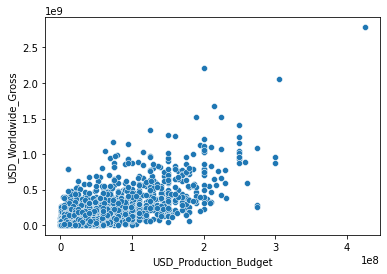

In [25]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

That should look familiar. 😊 Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart. For example, we can increase the size of our figure:

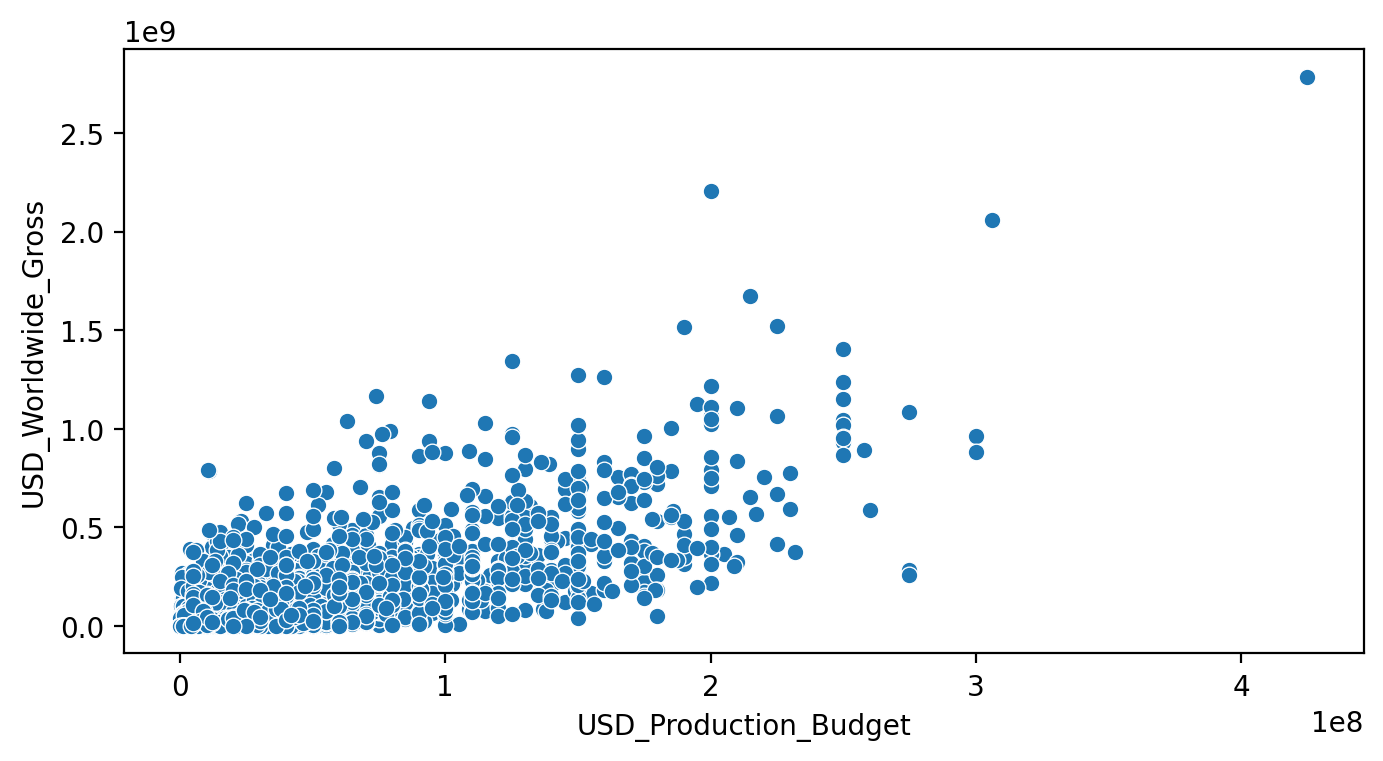

In [29]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')
plt.show()

And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

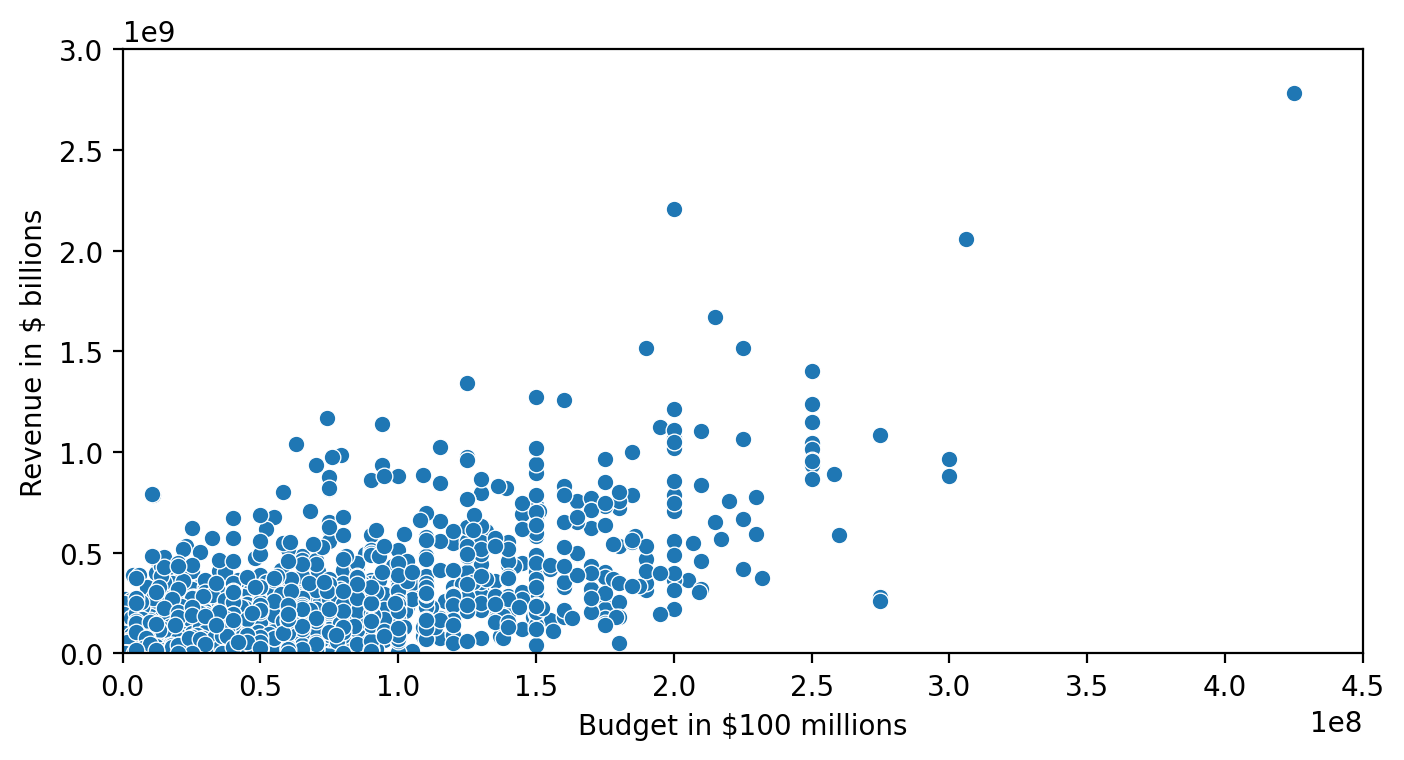

In [30]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

Here we're diving into the Matplotb layer to set the limits on the axes and change the labels.

# From Scatter Plot to Bubble Chart

But the reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

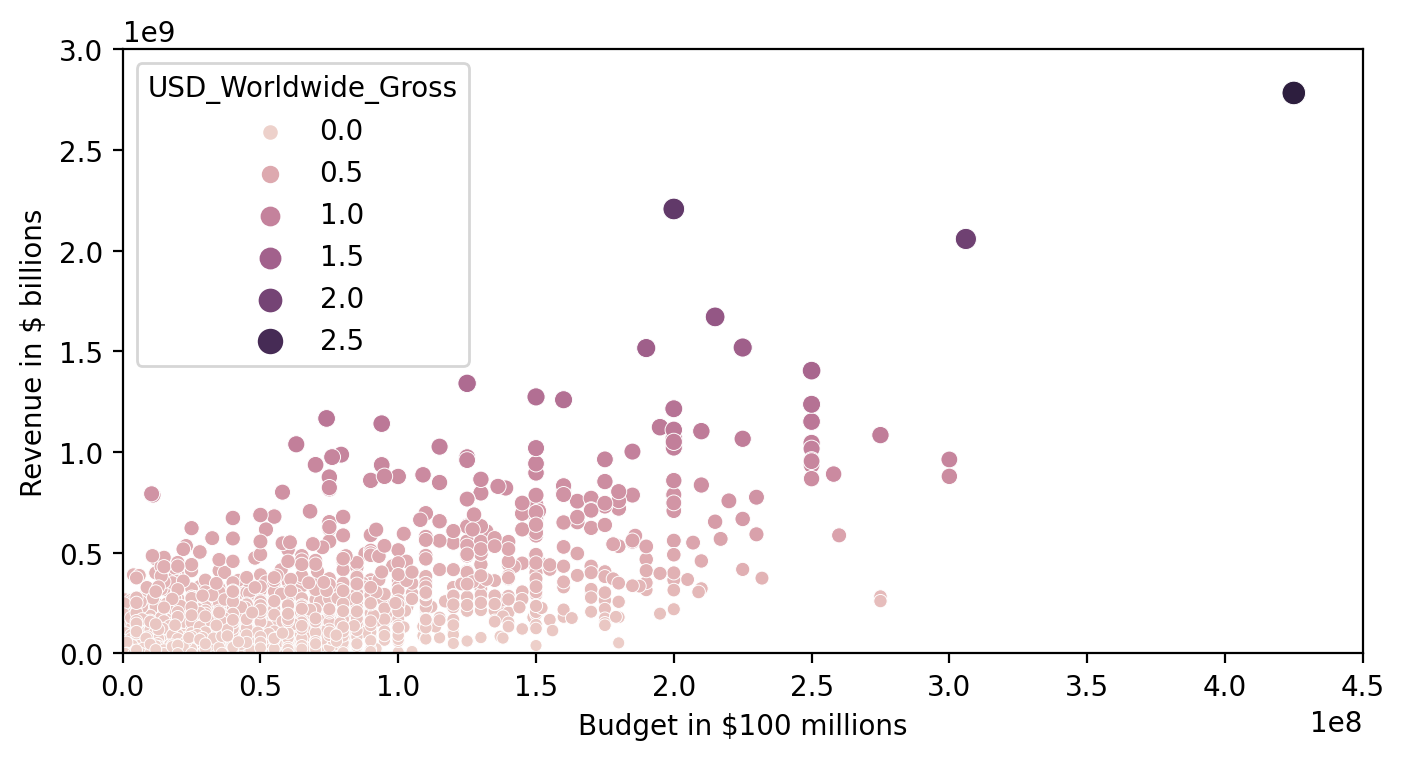

In [31]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword. We've seen with used already when it comes to opening files in previous lessons.

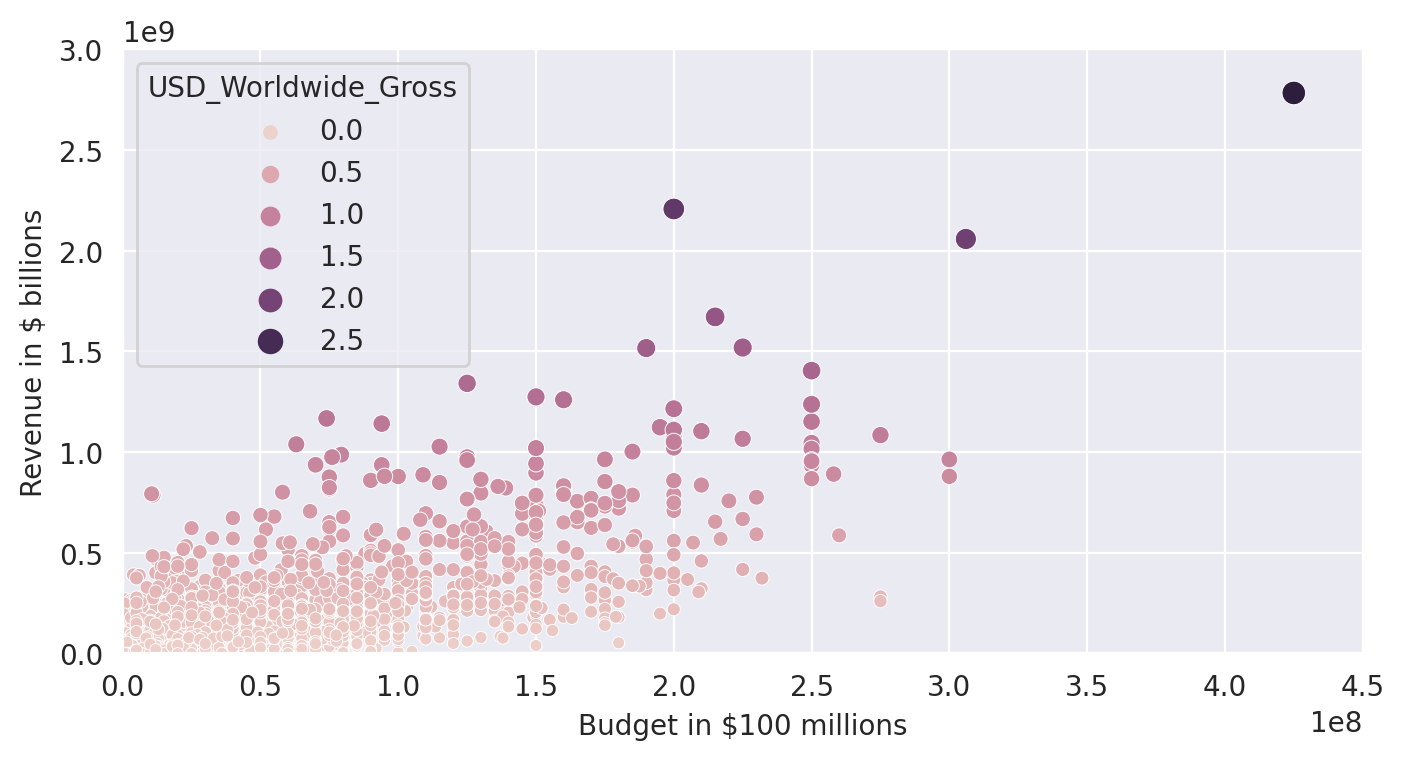

In [32]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

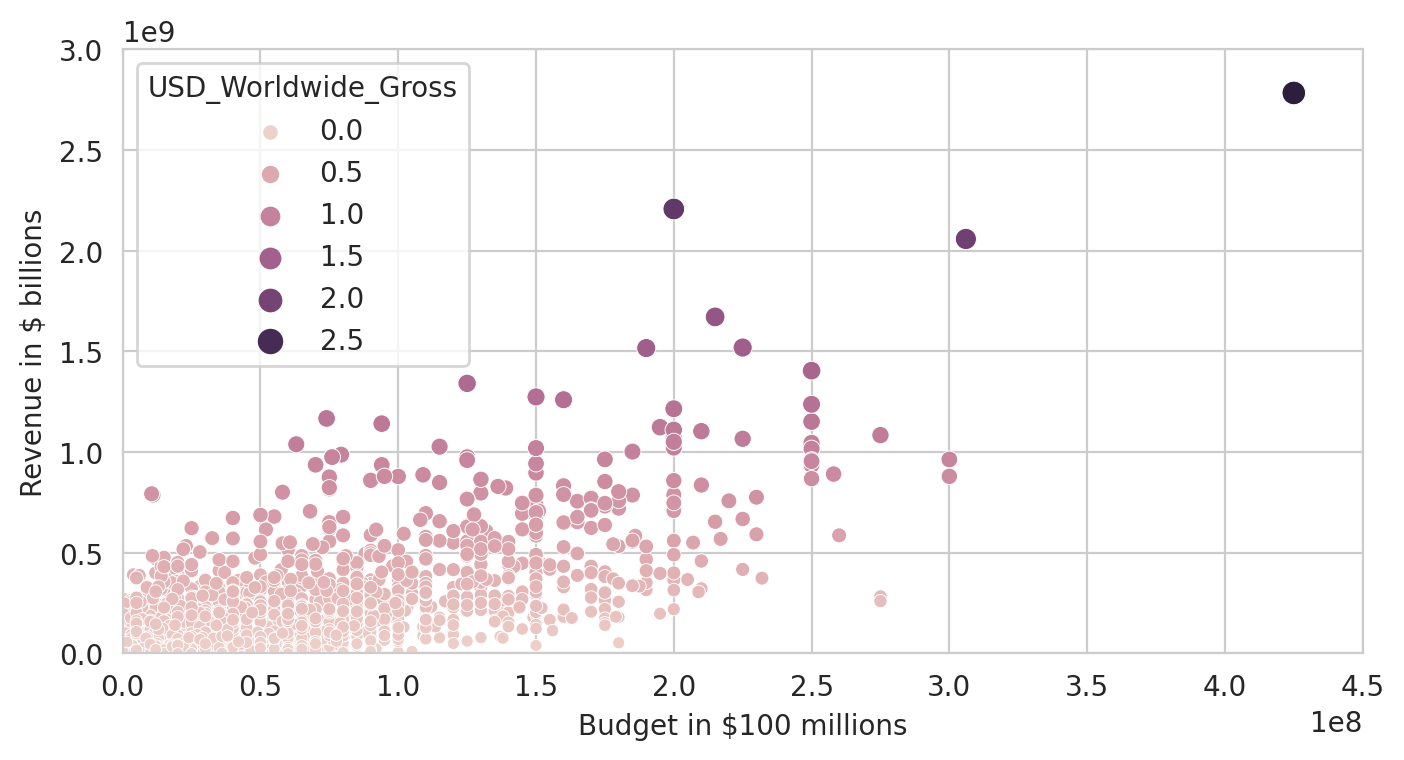

In [33]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('whitegrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

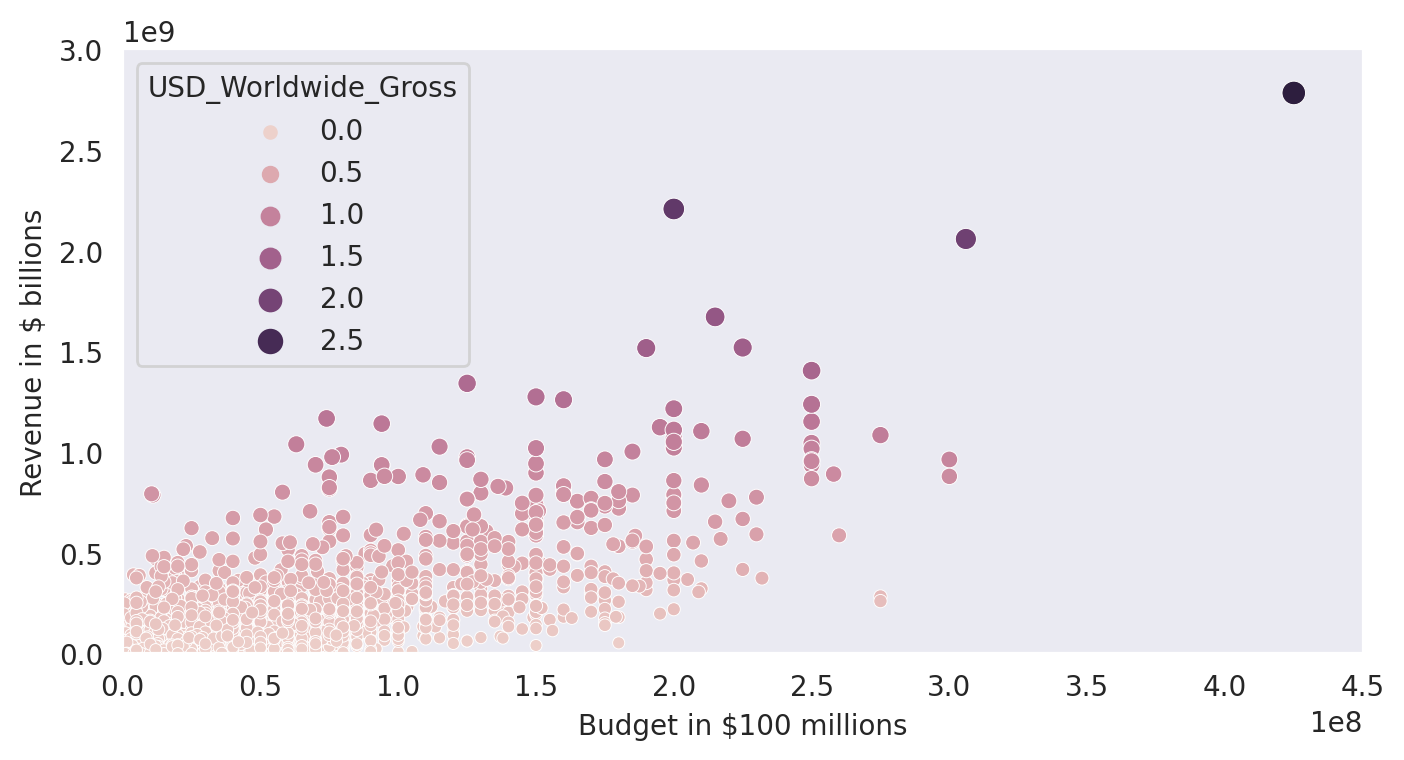

In [34]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('dark'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

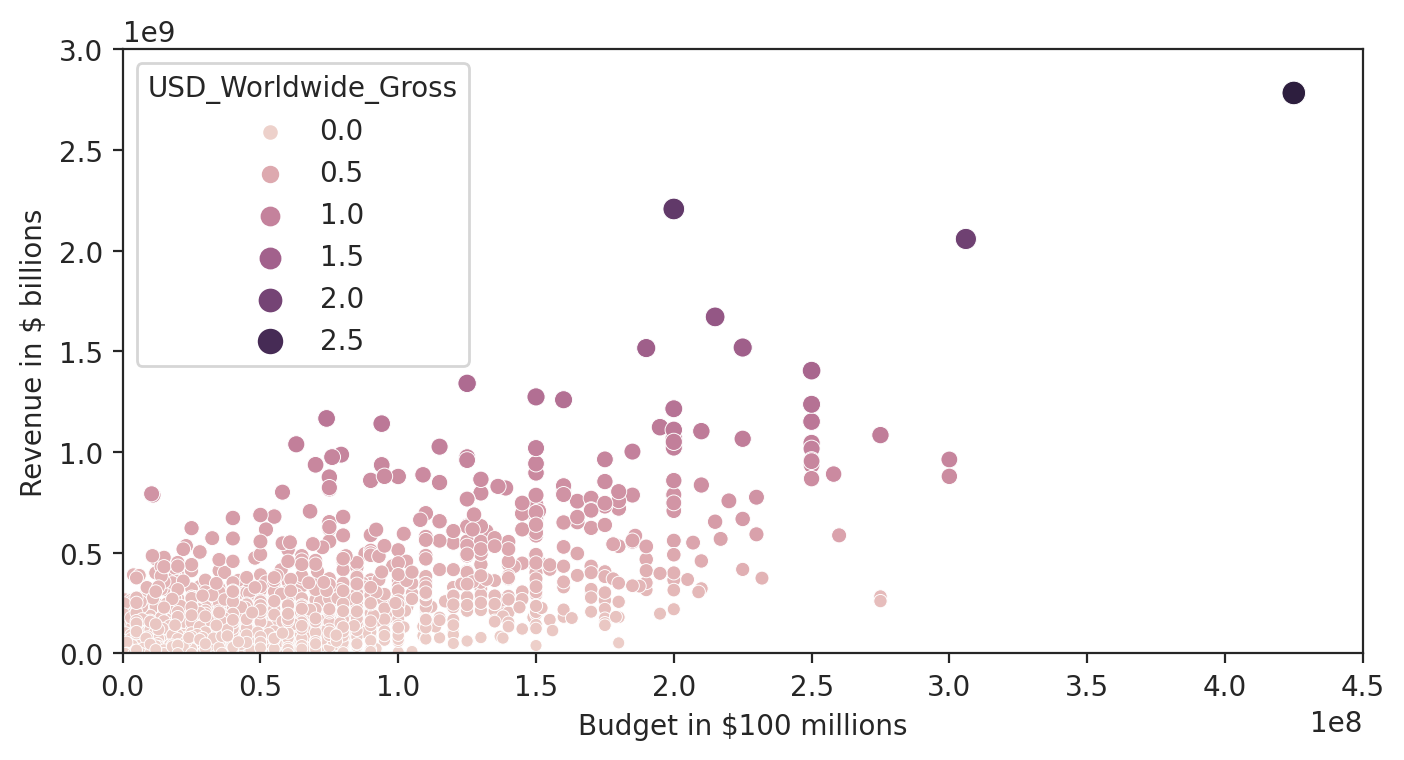

In [36]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('ticks'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

# THREE dimensional chart

write the code to replicate this chart? Notice how we are actually representing THREE dimensions in this chart: the budget, the release date, and the worldwide revenue. This is what makes bubble charts so awesomely informative.

In [37]:
data_clean.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000


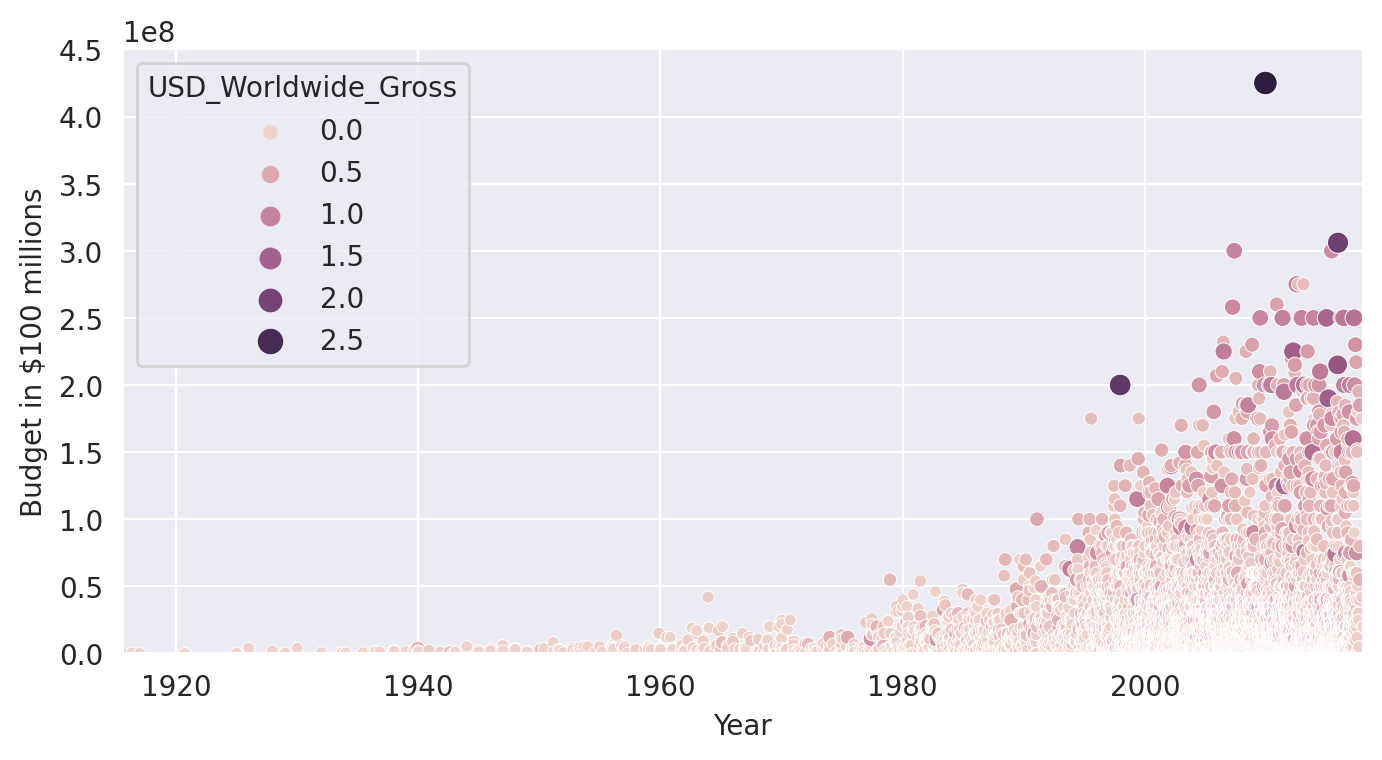

In [39]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
            
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 



plt.show()

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Floor Division: A Trick to Convert Years to Decades

In our bubble charts, we've seen how massively the industry has changed over time, especially from the 1970s onwards. This makes me think it makes sense to separate our films out by decade. Here's what I'm after:

# Create a column in data_clean that has the decade of the movie release

Can you create a column in data_clean that has the decade of the movie release. For example, a film released in 1992 or 1999 should have 1990 in the Decade column.

# 1. Create a DatetimeIndex object from the Release_Date column.

In [10]:
data_clean.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000


To create a DatetimeIndex, we just call the constructor and provide our release date column as an argument to initialise the DatetimeIndex object. Then we can extract all the years from the DatetimeIndex.

In [19]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
print(dt_index)

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)


In [20]:
years = dt_index.year
print(years)

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


# Using FLOOR DIVISION:


Now, all we need to do is convert the years to decades. For that, we will use floor division (aka integer division). The difference to regular division is that the result is effectively rounded down.

In [13]:
5.0 / 2

2.5

In [14]:
5.0 // 2

2.0

In our case, we will use the floor division by 10 and then multiplication by 10 to convert the release year to the release decade:

In [15]:
# How to convert 1999 year to 1990 decade?
1999 // 10

199

In [16]:
199 * 10

1990

We can do this for all the years and then add the decades back as a column.

In [21]:
decades = years // 10 * 10
print(decades)

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)


# 3. Add the decades as a Decade column to the data_clean DataFrame.

In [28]:
data_clean["Decade"] = decades

In [20]:
data_clean.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910


In [25]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 0 to 5383
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
 6   Decade                 5384 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 336.5+ KB


# 1. Create two new DataFrames: old_films and new_films

#  2. Old_films should include all the films before 1970 (up to and including 1969)

In [33]:
old_films = data_clean[data_clean.Decade <= 1960]

# 3. New_films should include all the films from 1970 onwards

In [32]:
new_films = data_clean[data_clean.Decade > 1960]

# 4. How many of our films were released prior to 1970? 

In [35]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
std,742.137130,5.713649e+06,5.493183e+07,3.264175e+07,12.719014
min,1253.000000,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000


The cut-off for our calculation is 1960 in the Decade column because this will still include 1969. When we inspect our old_films DataFrame we see that it only includes 153 films. As we saw in the bubble chart, the bulk of films in the dataset have been released in the last 30 years.

# 5. What was the most expensive film made prior to 1970?

In [39]:
old_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


The most expensive film prior to 1970 was Cleopatra, with a production budget of $42 million. That's some serious 1960s money, and judging by the trailer, a lot of it went into extravagant costumes, set design, and plenty of extras. Impressive.

In [40]:
new_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,2010
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,2010


# Plotting Linear Regressions with Seaborn

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the .regplot() function.

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

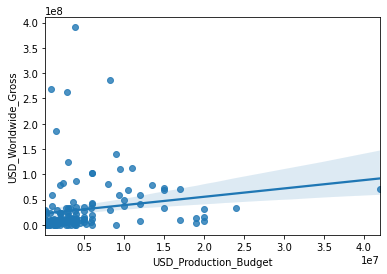

In [41]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time.

To style the chart further, we can once again, drop into the Matplotlib layer and supply keyword arguments as dictionaries. We can customise the scatter plot (e.g., by changing the transparency of the dots) and the regression line itself (e.g., by changing the colour).

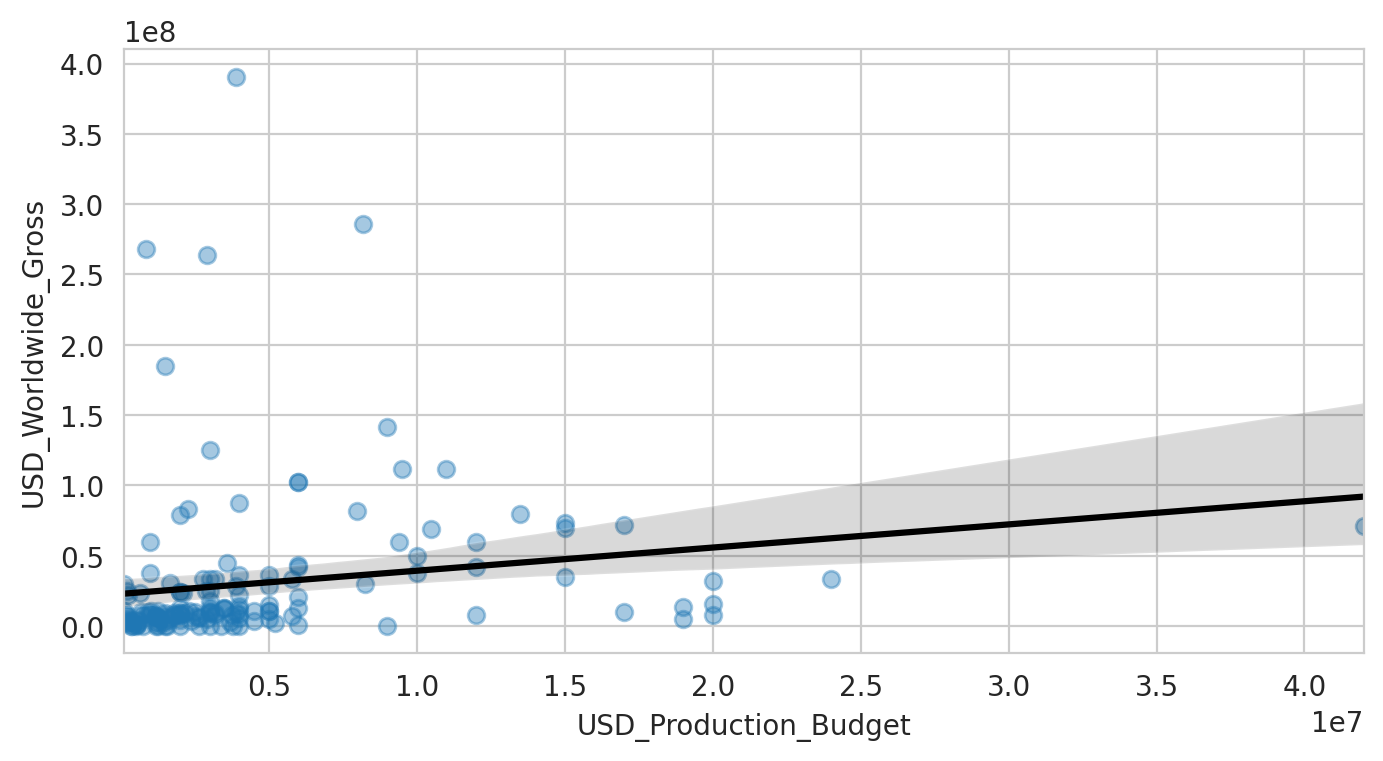

In [42]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

# Use Seaborn's .regplot() to show the scatter plot and linear regression line against the new_films.

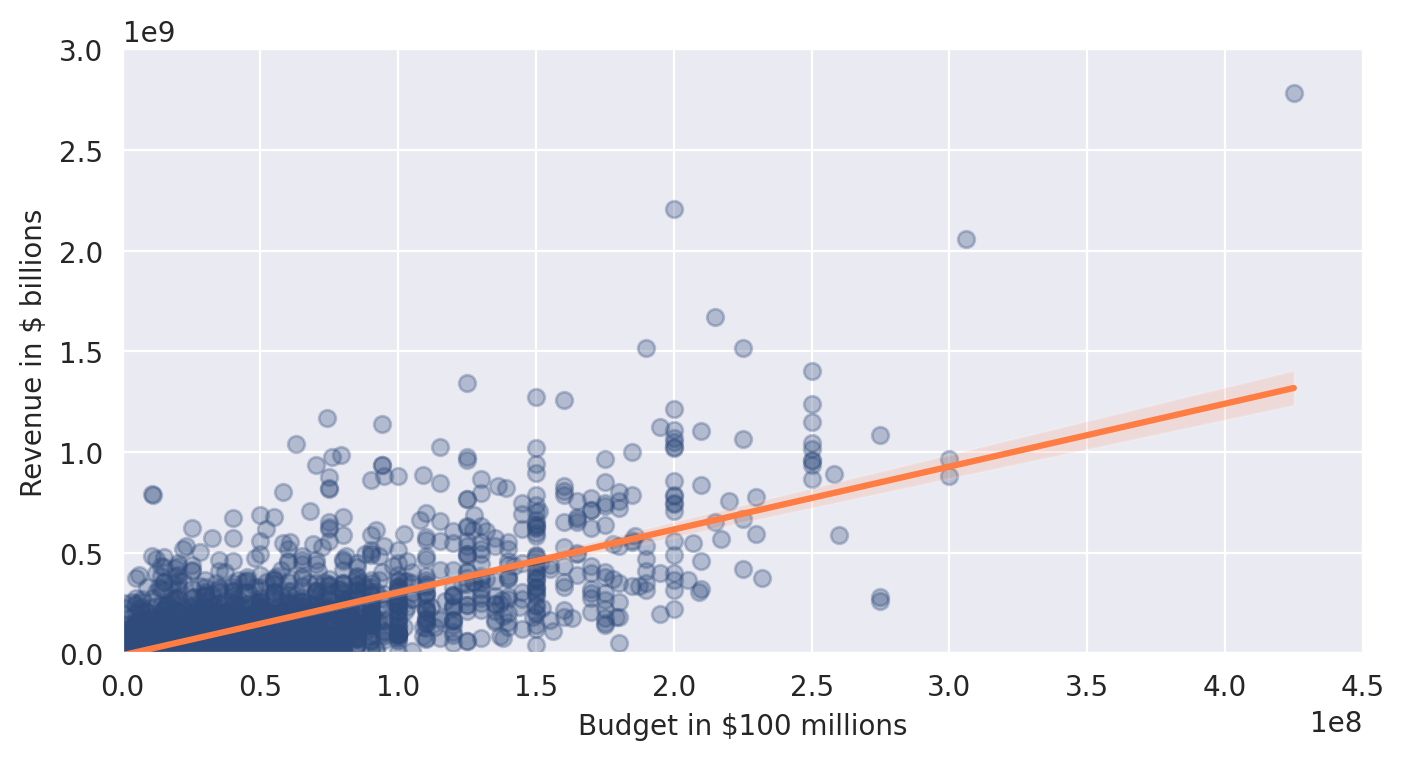

In [51]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       color='#2f4b7c', # color of dots
                       scatter_kws = {'alpha': 0.3},
                       line_kws = {'color': '#ff7c43'}) # color of line
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()


How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a 150 million budget is predicted to make slightly under 500 million by our regression line.

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

# Use scikit-learn to Run Your Own Regression

Let's dive into our linear regression model a bit more. We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues.

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

So how can we find out what our model's estimates are for theta-one and theta-zero? And how can we run our own regression, regardless of whether we want to visualise it on a chart? For that, we can use scikit-learn.

https://scikit-learn.org/stable/

# Import scikit-learn

In [53]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Now we can run a LinearRegression. First, let's create a LinearRegression object that will do the work for us.

In [54]:
regression = LinearRegression()

Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y:

In [55]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so I've created some new DataFrames here.

Now it's time to get to work and run the calculations:

In [56]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

In [57]:
# Theta zero:
regression.intercept_

array([-8650768.00661024])

In [58]:
# Theta one:
regression.coef_

array([[3.12259592]])

Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

# R-Squared: Goodness of Fit 

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [59]:
# R-squared
regression.score(X, y)

0.5577032617720403

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

# Run a linear regression for the old_films.

In [60]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

# Calculate the intercept, slope and r-squared.

In [61]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [62]:
# Theta zero:
# The intercept:
regression.intercept_

array([22821538.63508038])

In [63]:
# Theta one:
# The slope coefficient:
regression.coef_

array([[1.64771314]])

In [64]:
# R-squared
regression.score(X, y)

0.02937258620576877

Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.

This makes sense considering how poorly our data points aligned with our line earlier. There are no points near the line!

# We've just estimated the intercept and slope for the Linear Regression model. Now we can use it to make a prediction! For example, how much global revenue does our model estimate for a film with a budget of $350 million?

# Using the model to make a prediction:

For a 350 million budget film, our model predicts a worldwide revenue of around 600 million! You can calculate this as follows:

In [65]:
22821538 + 1.64771314 * 350000000

599521137.0

Or, using the regression object, you could also work it out like this:

In [66]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
